(i) Title: Video Game Sales Visualization

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import os

from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly import express as px

from plotly.offline import init_notebook_mode,iplot

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()
df=df.dropna()

In [4]:
df = df.sort_values('Global_Sales', ascending=True)

In [5]:
categorical_df = df.select_dtypes('O')
categorical_features = categorical_df.columns
categorical_df.head()

Name Platform      Genre  \
16597                                 Spirits & Spells      GBA   Platform   
16185           Tantei Jinguuji Saburo: Hai to Diamond      PSP  Adventure   
16184  Fatal Fury: Battle Archives Volume 2 (JP sales)      PS2   Fighting   
16183                      Sakura-Sou no Pet na Kanojo      PSP  Adventure   
16182                                  Princess Arthur      PSP       Misc   

              Publisher  
16597           Wanadoo  
16185  Arc System Works  
16184      SNK Playmore  
16183    Kadokawa Games  
16182      Idea Factory

(ii) Main figure: 

In [6]:
year_wise_sales = df.loc[:, ['Name', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by =  'Year'  ).sum()


fig1 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['NA_Sales'],
                  name = "North America's Sales")

fig2 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['EU_Sales'],
                  name = "Europe's Sales")

fig3 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['JP_Sales'],
                  name = "Japan's Sales")

fig4 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['Other_Sales'],
                  name = "Other region's Sales")

figs = [ fig1, fig2, fig3, fig4 ]

layout = dict(title = 'Total sales per year by region',
              xaxis= dict(title= 'Year' ),
              yaxis= dict(title= 'Total Sales(m)',)
             )

figure = dict(data = figs, layout = layout)

iplot(figure)

(iii) Legend:   
    Lines in four colors show the total number of video game sales in North America, Europe, Japan and other region. 

(iv) Findings:  
•	Total sales in North America are higher than three other regions at most of the time.  
•	All four regions reached their highest sale number at around year of 2008.  
•	After around year of 2008 the sales number in all four regions dropped dramatically.   
•	This could be the impact of the financial crisis of 2007–2008.


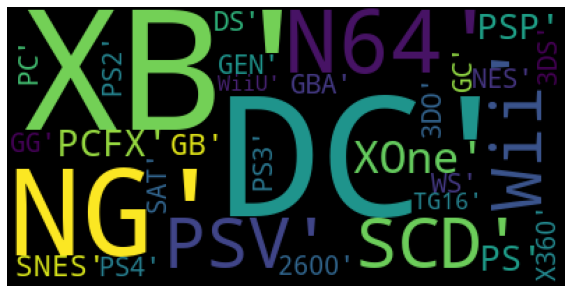

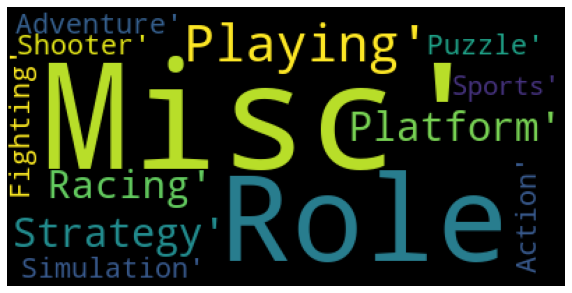

In [7]:
from wordcloud import WordCloud, STOPWORDS
text = list(set(df['Platform']))
plt.rcParams['figure.figsize'] = (10,15)
stopwords = set(STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

text = list(set(df['Genre']))
plt.rcParams['figure.figsize'] = (10,15)
stopwords = set(STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
total_sales_column = 'Total_Sales'
df[total_sales_column] = df['Global_Sales']
regions_agg = {}
regions_agg[total_sales_column] = 'sum'
genre_df = df.copy()
genre_df = genre_df.groupby(['Genre']).agg(regions_agg)
genre_total_df = genre_df.reset_index().sort_values(total_sales_column, ascending=False)
genre_tops = list(genre_total_df['Genre'])

publisher_df = df.copy()
publisher_df = publisher_df.groupby(['Publisher']).agg(regions_agg)
publisher_total_df = publisher_df.reset_index().sort_values(total_sales_column, ascending=False)
publisher_tops = list(publisher_total_df['Publisher'])

platform_df = df.copy()
platform_df = platform_df.groupby(['Platform']).agg(regions_agg)
platform_total_df = platform_df.reset_index().sort_values(total_sales_column, ascending=False)
platform_tops = list(platform_total_df['Platform'])

gpg_df = df[(df['Genre'].isin(genre_tops[:5])) & (df['Platform'].isin(platform_tops[:4])) & (df['Publisher'].isin(publisher_tops[:4]))]

fig = px.sunburst(gpg_df, path=['Genre', 'Platform', 'Publisher'], values=total_sales_column, color = 'Year',color_continuous_scale='gnbu')
fig.show()